In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/My Drive"
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import re

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ### Identifying dupliacted rows
# # row 49 is a duplicate of row 48
# df_no_dup = df.drop_duplicates(subset=df.columns.difference(['docid']), keep='first')
# # print(df_no_dup[:50])
# # print(df_no_dup)
# df_no_dup = df_no_dup.reset_index(drop=True)
# # Print the DataFrame with reset row numbers
# print(df_no_dup)
# df_no_dup.to_csv('achkust2023/ust_risk_data_noduplicates.csv', index=False)

                       docid  comment_count  like_count  dislike_count  \
0        2021100100000024806            NaN         0.0            0.0   
1        2021100100000030804            NaN         0.0            0.0   
2        2021100100000031413            NaN         0.0            0.0   
3        2021100100000031414            NaN         0.0            0.0   
4        2021100100000033085            NaN         0.0            0.0   
...                      ...            ...         ...            ...   
1065842  2023093021782923142            0.0         0.0            0.0   
1065843  2023093021783021140            NaN         NaN            NaN   
1065844  2023093021783068701            NaN         NaN            NaN   
1065845  2023093021783087964            NaN         NaN            NaN   
1065846  2023093021783379967            NaN         NaN            NaN   

         love_count  haha_count  wow_count  angry_count  sad_count  \
0               NaN         NaN        Na

many duplicates!

after deleting the duplicates (just keep one row of each repeated news), 1065847 rows are left


In [ ]:
### Get the data without duplicated rows
df_no_dup = pd.read_csv('achkust2023/ust_risk_data_noduplicates.csv')

In [ ]:
df_no_dup['pubname'] = df_no_dup['pubname'].str.replace(' ', '')

In [ ]:
print(df_no_dup)

                       docid  comment_count  like_count  dislike_count  \
0        2021100100000024806            NaN         0.0            0.0   
1        2021100100000030804            NaN         0.0            0.0   
2        2021100100000031413            NaN         0.0            0.0   
3        2021100100000031414            NaN         0.0            0.0   
4        2021100100000033085            NaN         0.0            0.0   
...                      ...            ...         ...            ...   
1065842  2023093021782923142            0.0         0.0            0.0   
1065843  2023093021783021140            NaN         NaN            NaN   
1065844  2023093021783068701            NaN         NaN            NaN   
1065845  2023093021783087964            NaN         NaN            NaN   
1065846  2023093021783379967            NaN         NaN            NaN   

         love_count  haha_count  wow_count  angry_count  sad_count  \
0               NaN         NaN        Na

In [ ]:
print("num of rows: ", len(df_no_dup))
print("% of values of Nan/0 in each column: \n", df_no_dup.isnull().sum()/len(df_no_dup))

num of rows:  1065847
% of values of Nan/0 in each column: 
 docid            0.000000
comment_count    0.823188
like_count       0.762247
dislike_count    0.762268
love_count       0.806572
haha_count       0.806572
wow_count        0.806661
angry_count      0.806661
sad_count        0.806661
share_count      0.001947
view_count       0.803884
emoji_count      0.959611
headline         0.000000
content          0.000004
md5(author)      0.035336
pubname          0.000000
pubcode          0.000000
pubtype          0.000028
pubdate          0.000000
region           0.892673
fans_count       0.892673
language         0.000000
dtype: float64


In [ ]:
# convert the type of the values under 'pubdate' from string to datetime
df_no_dup['pubdate'] = pd.to_datetime(df_no_dup['pubdate'])

# Get the earliest and latest publish time
earliest_time = df_no_dup['pubdate'].min()
latest_time = df_no_dup['pubdate'].max()
print("Earliest time:", earliest_time)
print("Latest time:", latest_time)

Earliest time: 2021-10-01 00:00:00
Latest time: 2023-09-30 23:58:00


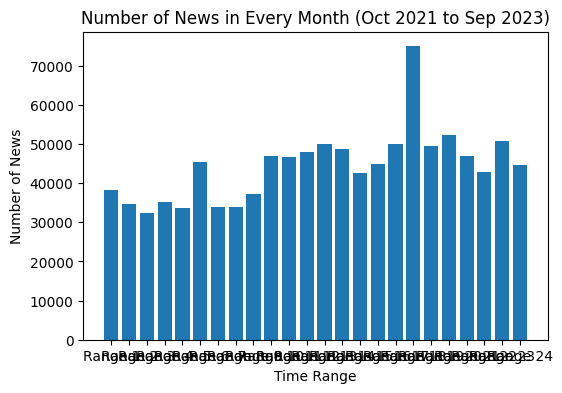

In [ ]:
# plot the number of news every month
# Define the time ranges
time_ranges = [
    ('2021-10-01 00:00:00', '2021-10-31 23:59:59'), # 1
    ('2021-11-01 00:00:00', '2021-11-30 23:59:59'), # 2
    ('2021-12-01 00:00:00', '2021-12-31 23:59:59'), # 3
    ('2022-01-01 00:00:00', '2022-01-31 23:59:59'), # 4
    ('2022-02-01 00:00:00', '2022-02-28 23:59:59'), # 5
    ('2022-03-01 00:00:00', '2022-03-31 23:59:59'), # 6
    ('2022-04-01 00:00:00', '2022-04-30 23:59:59'), # 7
    ('2022-05-01 00:00:00', '2022-05-31 23:59:59'), # 8
    ('2022-06-01 00:00:00', '2022-06-30 23:59:59'), # 9
    ('2022-07-01 00:00:00', '2022-07-31 23:59:59'), # 10
    ('2022-08-01 00:00:00', '2022-08-31 23:59:59'), # 11
    ('2022-09-01 00:00:00', '2022-09-30 23:59:59'), # 12
    ('2022-10-01 00:00:00', '2022-10-31 23:59:59'), # 13
    ('2022-11-01 00:00:00', '2022-11-30 23:59:59'), # 14
    ('2022-12-01 00:00:00', '2022-12-31 23:59:59'), # 15
    ('2023-01-01 00:00:00', '2023-01-31 23:59:59'), # 16
    ('2023-02-01 00:00:00', '2023-02-28 23:59:59'), # 17
    ('2023-03-01 00:00:00', '2023-03-31 23:59:59'), # 18 extra more news in this time range
    ('2023-04-01 00:00:00', '2023-04-30 23:59:59'), # 19
    ('2023-05-01 00:00:00', '2023-05-31 23:59:59'), # 20
    ('2023-06-01 00:00:00', '2023-06-30 23:59:59'), # 21
    ('2023-07-01 00:00:00', '2023-07-31 23:59:59'), # 22
    ('2023-08-01 00:00:00', '2023-08-31 23:59:59'), # 23
    ('2023-09-01 00:00:00', '2023-09-30 23:59:59') # 24
]

# Count the number of news in each time range
news_count = []
news_chunk = []
for start_time, end_time in time_ranges:
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    chunk = df_no_dup[(df_no_dup['pubdate'] >= start_time) & (df_no_dup['pubdate'] <= end_time)]
    count = len(chunk)
    news_count.append(count)
    news_chunk.append(chunk)

# Plot the number of news in different time ranges
plt.figure(figsize=(6, 4))
plt.bar(range(len(news_count)), news_count)
plt.xticks(range(len(news_count)), [f"Range {i+1}" for i in range(len(news_count))])
plt.xlabel('Time Range')
plt.ylabel('Number of News')
plt.title('Number of News in Every Month (Oct 2021 to Sep 2023)')
plt.show()

Mar 2023 has extra much news

In [ ]:
# perform summary statistics
print(df_no_dup.describe())

              docid  comment_count     like_count  dislike_count  \
count  1.065847e+06  188455.000000  253408.000000  253386.000000   
mean   2.022396e+18       5.671789      89.043282       0.239236   
std    6.307733e+14      38.105697     674.258558       9.266812   
min    2.021100e+18       0.000000      -1.000000       0.000000   
25%    2.022051e+18       0.000000       0.000000       0.000000   
50%    2.022111e+18       0.000000       0.000000       0.000000   
75%    2.023041e+18       0.000000       3.000000       0.000000   
max    2.023093e+18    5466.000000   68338.000000    1864.000000   

          love_count     haha_count      wow_count    angry_count  \
count  206165.000000  206165.000000  206070.000000  206070.000000   
mean        0.205433       3.449596       0.367924       0.490814   
std         4.457932      63.841856       6.347906      10.732303   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [ ]:
# Groupby the news by pubtype
pubtype = df_no_dup.groupby("pubtype")
# Summary statistic of all pubtypes
pd.set_option('display.max_columns', None)
pubtype.describe()
# C(Social), K(Blog), L(Forum), and U(Web)

docid                                                          \
            count          mean           std           min           25%   
pubtype                                                                     
C        114394.0  2.022370e+18  6.379873e+14  2.021100e+18  2.022042e+18   
K         23226.0  2.022170e+18  6.322967e+14  2.021100e+18  2.022022e+18   
L         26963.0  2.022232e+18  6.668323e+14  2.021100e+18  2.022022e+18   
U        901234.0  2.022410e+18  6.268031e+14  2.021100e+18  2.022052e+18   

                                                  comment_count             \
                  50%           75%           max         count       mean   
pubtype                                                                      
C        2.022110e+18  2.023042e+18  2.023093e+18       98797.0   8.518295   
K        2.022071e+18  2.023012e+18  2.023093e+18        2316.0   0.000000   
L        2.022082e+18  2.023031e+18  2.023093e+18       18704.0  12.126925   
U        2.022112e+18  2.023041e+18  2.023093e+18       68637.0   0.006848   

                                               like_count              \
               std  min  25%  50%  75%     max      count        mean   
pubtype                                                                 
C        47.328108  0.0  0.0  0.0  1.0  5466.0   102458.0  219.126403   
K         0.000000  0.0  0.0  0.0  0.0     0.0     4755.0    0.000000   
L        50.857005  0.0  0.0  0.0  3.0  1228.0    20543.0    5.084506   
U         1.290370  0.0  0.0  0.0  0.0   295.0   125651.0    0.068253   

                                                   dislike_count            \
                 std  min  25%  50%   75%      max         count      mean   
pubtype                                                                      
C        1046.275440 -1.0  0.0  7.0  55.0  68338.0      102458.0  0.042749   
K           0.000000  0.0  0.0  0.0   0.0      0.0        4755.0  0.000000   
L          58.867608  0.0  0.0  0.0   0.0   4391.0       20521.0  2.740510   
U          22.566312  0.0  0.0  0.0   0.0   7987.0      125651.0  0.000000   

                                               love_count                      \
               std  min  25%  50%  75%     max      count      mean       std   
pubtype                                                                         
C         1.725150  0.0  0.0  0.0  0.0   230.0    41070.0  1.031239  9.945375   
K         0.000000  0.0  0.0  0.0  0.0     0.0     2797.0  0.000000  0.000000   
L        32.229079  0.0  0.0  0.0  0.0  1864.0     5835.0  0.000000  0.000000   
U         0.000000  0.0  0.0  0.0  0.0     0.0   156462.0  0.000000  0.000000   

                                   haha_count                              \
         min  25%  50%  75%    max      count       mean         std  min   
pubtype                                                                     
C        0.0  0.0  0.0  0.0  625.0    41070.0  17.316435  142.197265  0.0   
K        0.0  0.0  0.0  0.0    0.0     2797.0   0.000000    0.000000  0.0   
L        0.0  0.0  0.0  0.0    0.0     5835.0   0.000000    0.000000  0.0   
U        0.0  0.0  0.0  0.0    0.0   156462.0   0.000000    0.000000  0.0   

                               wow_count                                      \
         25%  50%  75%     max     count      mean        std  min  25%  50%   
pubtype                                                                        
C        0.0  0.0  0.0  8982.0   41030.0  1.847867  14.129836  0.0  0.0  0.0   
K        0.0  0.0  0.0     0.0    2797.0  0.000000   0.000000  0.0  0.0  0.0   
L        0.0  0.0  0.0     0.0    5780.0  0.000000   0.000000  0.0  0.0  0.0   
U        0.0  0.0  0.0     0.0  156462.0  0.000000   0.000000  0.0  0.0  0.0   

                    angry_count                                           \
         75%    max       count      mean        std  min  25%  50%  75%   
pubtype                                      

idea: adjust the weight of edgs by the relative scores of the count

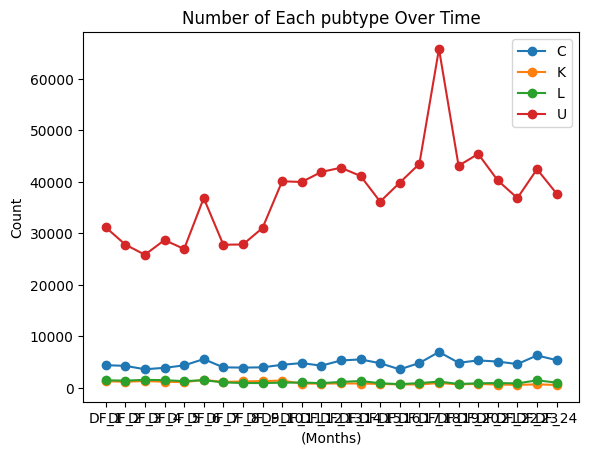

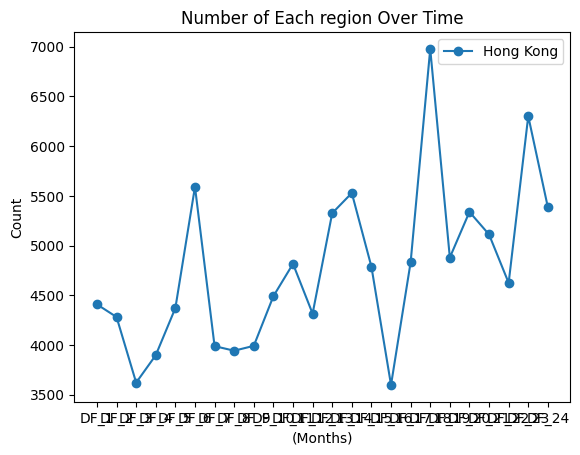

,DF_1,DF_2,DF_3,DF_4,DF_5,DF_6,DF_7,DF_8,DF_9,DF_10,DF_11,DF_12,DF_13,DF_14,DF_15,DF_16,DF_17,DF_18,DF_19,DF_20,DF_21,DF_22,DF_23,DF_24
Hong Kong,4408,4281,3621,3897,4371,5590,3988,3942,3991,4490,4816,4315,5325,5528,4787,3598,4831,6977,4879,5338,5111,4624,6301,5385


In [ ]:
def plot_over_time(col='', vals=[]):
  period_counts = {}

  # Iterate over each DataFrame
  for i, df in enumerate(news_chunk):
      # Count the occurrences of each pubtype in the current DataFrame
      counts = df[col].value_counts()
      # Store the counts in the dictionary
      period_counts[f'DF_{i+1}'] = counts

  # Convert the dictionary to a DataFrame
  counts_df = pd.DataFrame(period_counts)
  counts_df = counts_df.fillna(0)
  # Set the x-axis labels (the DataFrame names)
  x_labels = counts_df.columns.tolist()

  # Plot the changes over time for each value
  for val in vals:
      plt.plot(x_labels, counts_df.loc[val], marker='o', label=val)

  # Set plot labels and title
  plt.xlabel('(Months)')
  plt.ylabel('Count')
  plt.title('Number of Each '+col+' Over Time')

  # Add a legend
  if (len(vals)<=10):
    plt.legend()
  # Show the plot
  plt.show()
  return counts_df

plot_over_time('pubtype', ['C', 'K', 'L', 'U']) # C(Social), K(Blog), L(Forum), and U(Web)
plot_over_time('region', ['Hong Kong'])

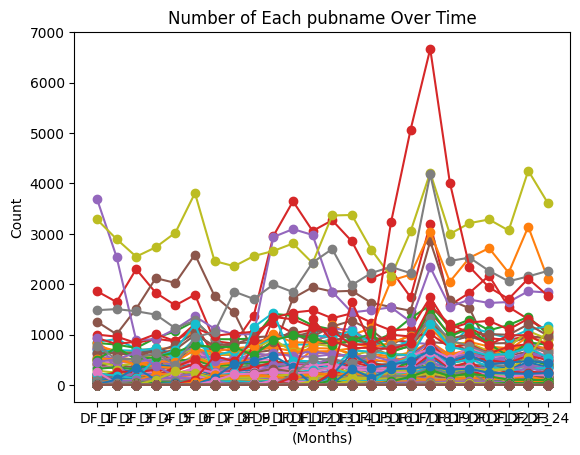

In [ ]:
pubname_over_time = plot_over_time('pubname', df_no_dup['pubname'].unique())

6000+ posts from Investing.com in Mar 2023, that's why there are so many post in that month


In [ ]:
print("Investing.com: ")
print(df_no_dup[df_no_dup['pubname'] == 'Investing.com'])
print("\n\nhk.investing.com")
print(df_no_dup[df_no_dup['pubname'] == 'hk.investing.com'])

Investing.com: 
                       docid  comment_count  like_count  dislike_count  \
489557   2022101421771028713            NaN         NaN            NaN   
490069   2022101500001463618            NaN         NaN            NaN   
492256   2022101700001378423            NaN         NaN            NaN   
492259   2022101700001378829            NaN         NaN            NaN   
492260   2022101700001378834            NaN         NaN            NaN   
...                      ...            ...         ...            ...   
1064962  2023092921783698703            NaN         NaN            NaN   
1064969  2023092921783918270            NaN         NaN            NaN   
1064971  2023092921783926130            NaN         NaN            NaN   
1064974  2023092921783991069            NaN         NaN            NaN   
1065821  2023093021781804950            NaN         NaN            NaN   

         love_count  haha_count  wow_count  angry_count  sad_count  \
489557          0.0      

In [ ]:
### publish sources that have published over 1500 posts in any month
filtered_df = pubname_over_time[pubname_over_time > 1500].dropna(how='all')
# print(filtered_df)
row_names = filtered_df.index.tolist()
# Print the row names
print(row_names)

['Facebook香港', 'Investing.com', 'LineToday', 'YouTube香港', 'hk.investing.com', '中國評論新聞網', '新浪網(香港)', '星島日報網', '阿思達克財經網', '雅虎(香港)', '香港經濟日報(即時新聞)', '香港經濟日報網']


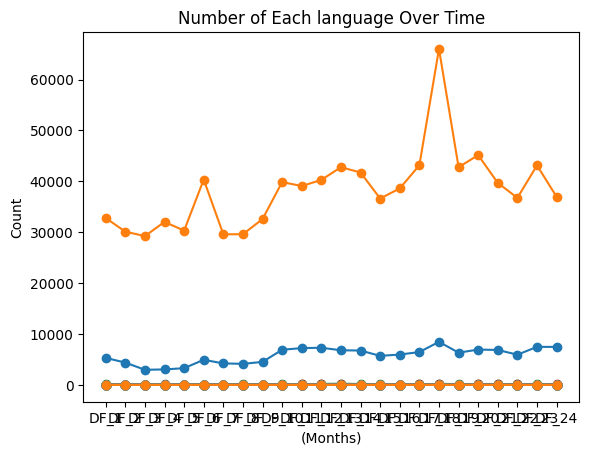

In [ ]:
pubname_over_time = plot_over_time('language', df_no_dup['language'].unique())

text:  

AsoneofChina’slargeststate-ownedlenders,ChinaConstructionBank(CCB)isvigorouslyaligningitsprogramme
There are 58741299 words in the combination of all review.


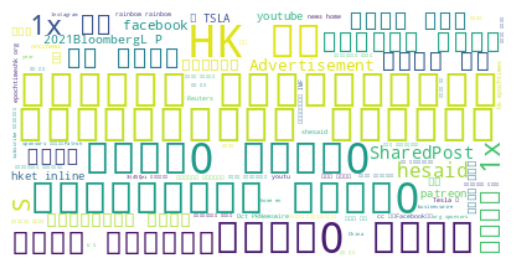

In [ ]:
# text = df.content[2]
text = " ".join(review for review in news_chunk[0].content)
print("text: ", text[:100])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
# exclude these words:
stopwords.update(["http", "https", "bit", "ly", "Thisisamodalwindow"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()